<a href="https://colab.research.google.com/github/cecilegltslmcs/cats-classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Classifier

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

%matplotlib inline

In [2]:
sns.set_palette("Pastel2")
sns.set_theme("notebook")

In [3]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Projets/Cats-classification/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Reading a random picture

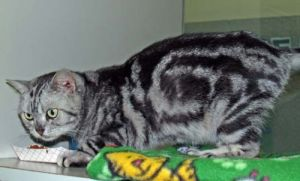

In [4]:
name = "British Shorthair/9478217_2517.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

In [5]:
# changing size
img = load_img(fullname, target_size=(299,299))

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

## 2) Modelisation

### a) Preparing the data

In [7]:
img_height = 299
img_width = 299
batch_size = 64
channel = 3

In [8]:
# Creating a train set
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 119382 files belonging to 28 classes.
Using 95506 files for training.


In [9]:
# Creating a validation set
val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 119382 files belonging to 28 classes.
Using 23876 files for validation.


In [10]:
num_classes = 28

In [11]:
class_names = train_set.class_names
print(class_names)

['American Bobtail', 'American Shorthair', 'Bengal', 'British Shorthair', 'Calico', 'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair', 'Domestic Medium Hair', 'Domestic Short Hair', 'Extra-Toes Cat - Hemingway Polydactyl', 'Himalayan', 'Maine Coon', 'Manx', 'Norwegian Forest Cat', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Snowshoe', 'Sphynx - Hairless Cat', 'Tabby', 'Tiger', 'Torbie', 'Tortoiseshell', 'Turkish Angora', 'Turkish Van', 'Tuxedo']


### b) Custom CNN

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 299, 299, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 700928)            0         
                                                                 
 dense (Dense)               (None, 64)                44859456  
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                        

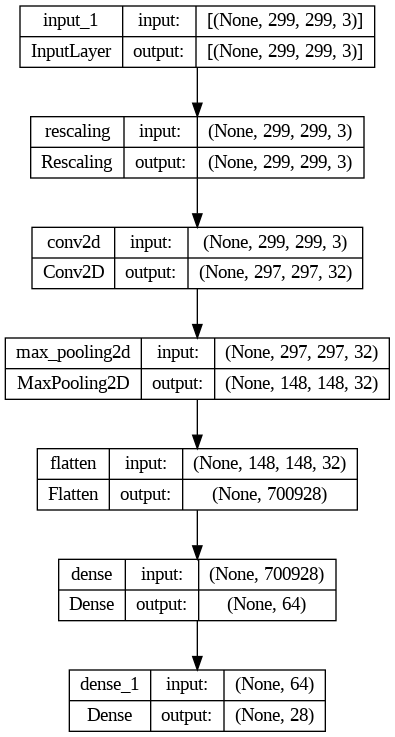

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    train_set,
    epochs = 10,
    validation_data=val_set
)

Epoch 1/10
1493/1493 [==============================] - 1317s 882ms/step - loss: 3.0188 - accuracy: 0.4217 - val_loss: 2.4406 - val_accuracy: 0.4344
Epoch 2/10
1493/1493 [==============================] - 1132s 758ms/step - loss: 2.3709 - accuracy: 0.4467 - val_loss: 2.4071 - val_accuracy: 0.4343
Epoch 3/10
1493/1493 [==============================] - 1128s 755ms/step - loss: 2.2840 - accuracy: 0.4478 - val_loss: 2.4209 - val_accuracy: 0.4340
Epoch 4/10
1493/1493 [==============================] - 1115s 747ms/step - loss: 2.1735 - accuracy: 0.4528 - val_loss: 2.5256 - val_accuracy: 0.4331
Epoch 5/10
1493/1493 [==============================] - 1139s 763ms/step - loss: 2.0469 - accuracy: 0.4611 - val_loss: 2.5730 - val_accuracy: 0.4222
Epoch 6/10
1493/1493 [==============================] - 1093s 732ms/step - loss: 1.9234 - accuracy: 0.4714 - val_loss: 2.7718 - val_accuracy: 0.4043
Epoch 7/10
1493/1493 [==============================] - 1098s 735ms/step - loss: 1.8076 - accuracy: 0.4840

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [ ]:
# Accuracy and Loss graphical representation
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
mean_accuracy = np.mean(history.history["accuracy"])
std_accuracy = np.std(history.history["accuracy"])
mean_validation_accuracy = np.mean(history.history["val_accuracy"])
std_validation_accuracy = np.std(history.history["val_accuracy"])

mean_loss = np.mean(history.history["loss"])
std_loss = np.std(history.history["loss"])
mean_validation_loss = np.mean(history.history["loss"])
std_validation_loss = np.std(history.history["loss"])

In [ ]:
print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

**Some resources about Optimizer and Loss Functions when performing a multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

#### Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    directory=path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
history = model.fit(
    train_set,
    epochs = 10,
    validation_data=val_set
)

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [ ]:
# Accuracy and Loss graphical representation
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
mean_accuracy = np.mean(history.history["accuracy"])
std_accuracy = np.std(history.history["accuracy"])
mean_validation_accuracy = np.mean(history.history["val_accuracy"])
std_validation_accuracy = np.std(history.history["val_accuracy"])

mean_loss = np.mean(history.history["loss"])
std_loss = np.std(history.history["loss"])
mean_validation_loss = np.mean(history.history["loss"])
std_validation_loss = np.std(history.history["loss"])

In [ ]:
print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

### b) Transfer Learning

- MobileNet
- VGG16/19
- Xception
- EfficientBNet